## This section explains the exploratory data analysis of the dataset

### Task - Semantic segmentation
### Dataset - [scannet](https://github.com/ScanNet/ScanNet)
#### Data preperation - [Link](https://github.com/RnDProjectsDeebul/ManojKolpeThesis/tree/main/src/segmentation/dataset/scannet)
#### scene0000_00 - indoor room scenes

Number of color images - 279 - ".png" images - 3 channel RGB images

Number of label images - 279 - ".png" images - single channel (each pixel representing a class)

Number of extrinsic parameter data - 279 - ".txt" file - 4x4 matrix

Labels of classes in the images

1	wall\
2	floor\
3	cabinet\
4	bed\
5	chair\
6	sofa\
7	table\
8	door\
9	window\
10	bookshelf\
11	picture\
12	counter\
13	blinds\
14	desk\
15	shelves\
16	curtain\
17	dresser\
18	pillow\
19	mirror\
20	floor mat\
21	clothes\
22	ceiling\
23	books\
24	refridgerator\
25	television\
26	paper\
27	towel\
28	shower curtain\
29	box\
30	whiteboard\
31	person\
32	nightstand\
33	toilet\
34	sink\
35	lamp\
36	bathtub\
37	bag\
38	otherstructure\
39	otherfurniture\
40	otherprop

- Frame starts at 0 and ends at 5560
- Some frames between 0 and 5560 are dropped resulting in total of 279 frames

In [1]:
from PIL import Image
import numpy as np
import os
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import imageio
from matplotlib.pyplot import figure
from pytransform3d.rotations import (
    quaternion_integrate, matrix_from_quaternion, plot_basis)
import random

/home/latai/anaconda3/envs/latai/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, '230'), Text(0, 0, '49')]

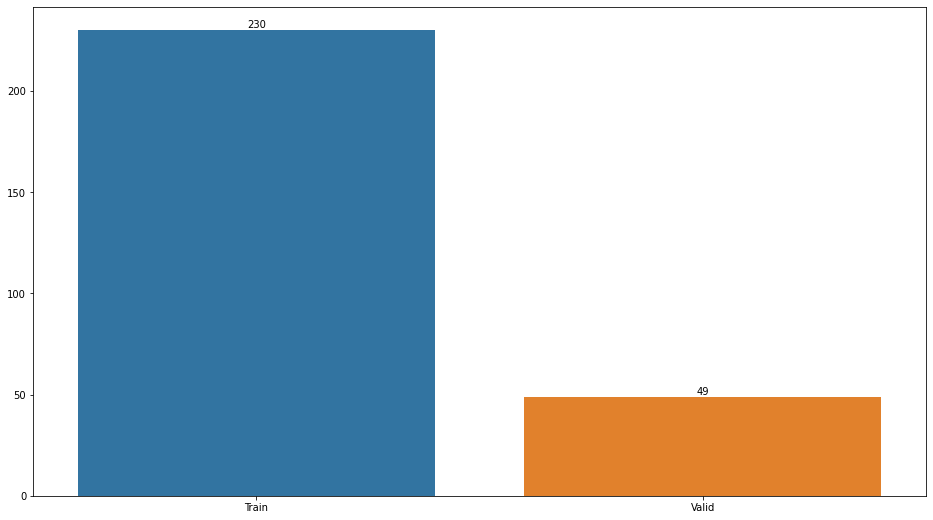

In [2]:
data = {"Train":230, "Valid":49}
plt.figure(figsize=(16,9))
ax = sns.barplot(list(data.keys()), list(data.values()))
ax.bar_label(ax.containers[0])

In [3]:
def plot_data(dataset):
#     dataset = "/home/latai/Documents/Master_thesis_v2/data/test4/label_train_n/"

    classes = []
    for i in os.listdir(dataset):
        classes.append(np.array(Image.open(dataset+i)).flatten())

    print("Number of images:", len(classes))
    print("Shape of single image:", np.array(Image.open(dataset+i)).shape)

    flat_list = [x for xs in classes for x in xs]
    print("Total number of pixel in entire dataset:", len(flat_list))
    counted = dict(Counter(flat_list))
    print("Label data:")
    print(counted)

    factor=1.0/sum(counted.values())
    normalised_d = {k: v*factor for k, v in counted.items() }

    plt.figure(figsize=(16,9))
    ax = sns.barplot(list(normalised_d.keys()), list(normalised_d.values()))
    ax.set_title('Class label distribution')
    ax.set_ylabel('Normalized number of pixels per class')
    ax.set_xlabel('Lables')

## Train

Number of images: 230
Shape of single image: (240, 320)
Total number of pixel in entire dataset: 17664000
Label data:
{1: 3258294, 16: 1207570, 0: 534506, 18: 68294, 3: 2050782, 14: 288810, 40: 741887, 4: 814283, 32: 74882, 39: 173481, 2: 4175657, 6: 1206447, 7: 594626, 8: 599728, 34: 62331, 24: 701147, 12: 43093, 22: 45495, 19: 3897, 33: 75315, 15: 556335, 38: 313119, 25: 50373, 9: 23648}


/home/latai/anaconda3/envs/latai/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


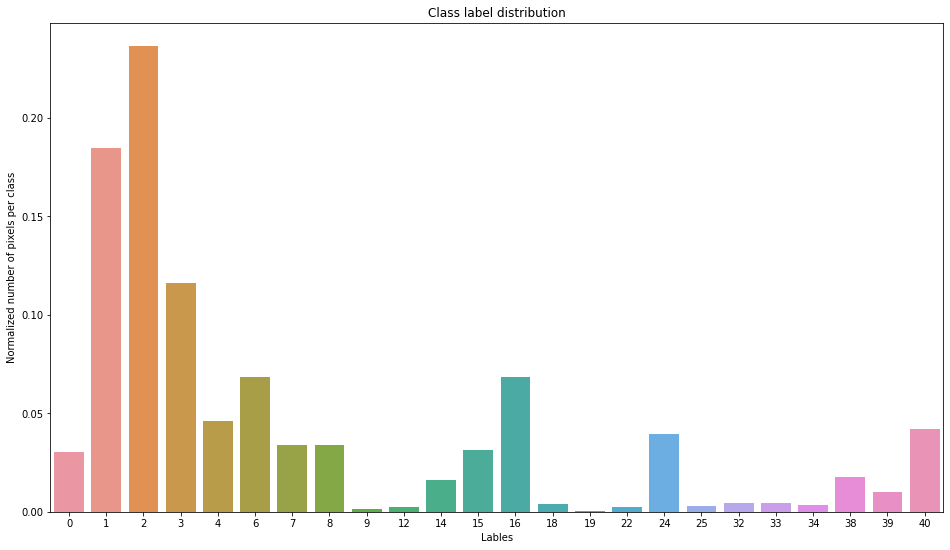

In [4]:
plot_data("/home/latai/Documents/Master_thesis_v2/data/test4/label_train_n/")

## Valid

Number of images: 49
Shape of single image: (240, 320)
Total number of pixel in entire dataset: 3763200
Label data:
{1: 505238, 16: 210778, 40: 358325, 0: 124930, 7: 444204, 2: 657335, 6: 387574, 3: 613523, 15: 151353, 25: 15671, 9: 19034, 12: 135890, 14: 18374, 39: 2655, 24: 114177, 8: 9, 32: 2065, 4: 2065}


/home/latai/anaconda3/envs/latai/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


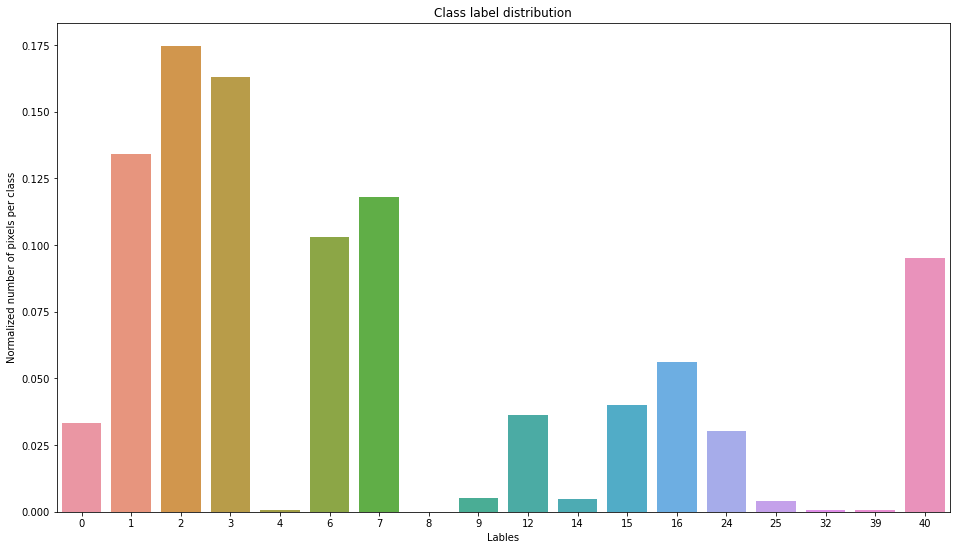

In [5]:
plot_data("/home/latai/Documents/Master_thesis_v2/data/test4/label_valid_n/")

## Images to gif

## Train

In [6]:
images = []
files = "/home/latai/Documents/Master_thesis_v2/data/test4/color_train/"
for filename in os.listdir(files):
    images.append(imageio.imread(files+filename))
imageio.mimsave('scene0000_00_train.gif', images, duration=0.5)

/home/latai/anaconda3/envs/latai/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  after removing the cwd from sys.path.


## Valid

In [7]:
images = []
files = "/home/latai/Documents/Master_thesis_v2/data/test4/color_valid/"
for filename in os.listdir(files):
    images.append(imageio.imread(files+filename))
imageio.mimsave('scene0000_00_valid.gif', images, duration=0.5)

/home/latai/anaconda3/envs/latai/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  after removing the cwd from sys.path.


## Plotting pose of the camera

## Train

In [8]:
pose = "/home/latai/Documents/Master_thesis_v2/data/test4/pose_train/"

In [9]:
import re
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)

In [10]:
r_values = []
trans_values = []

for i in sorted_alphanumeric(os.listdir(pose)):
#     print(pose+i)
    with open(pose+i) as f:
        lines = f.readlines()
#     print(lines)
#     print(lines[0].split(' '))
    
    r_temp = []
    trans_temp = []
    
    for j in range(len(lines)-1):
        r_temp_2 = []
        for i in range(len(lines[j].split(' '))-1):
#             print(lines[j].split(' ')[i])
            r_temp_2.append(float(lines[j].split(' ')[i]))
        r_temp.append(r_temp_2)
#         print("------")
#         print(lines[j].split(' ')[-1])
        trans_temp.append(float(lines[j].split(' ')[-1]))
    r_temp = np.array(r_temp)
#     print(r_temp)
#     print(trans_temp)
    r_values.append(r_temp)
    trans_values.append(trans_temp)

In [11]:
trans_values_np = np.array(trans_values)
sequence_containing_x_vals =  [x[0] for x in trans_values_np]
sequence_containing_y_vals =  [x[1] for x in trans_values_np]
sequence_containing_z_vals =  [x[2] for x in trans_values_np]

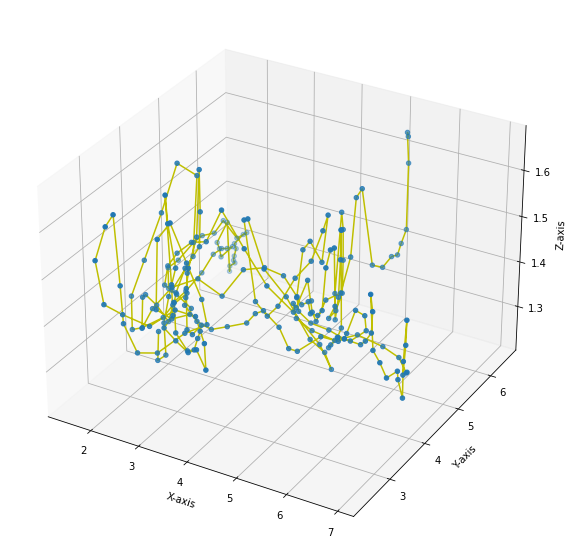

In [12]:


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

sequence_containing_x_vals =  [x[0] for x in trans_values_np]
sequence_containing_y_vals =  [x[1] for x in trans_values_np]
sequence_containing_z_vals =  [x[2] for x in trans_values_np]


ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
ax.plot(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, color='y')

xLabel = ax.set_xlabel('X-axis', linespacing=3.2)
yLabel = ax.set_ylabel('Y-axis', linespacing=3.1)
zLabel = ax.set_zlabel('Z-axis', linespacing=3.4)
plt.show()

## Valid

In [13]:
pose = "/home/latai/Documents/Master_thesis_v2/data/test4/pose_valid/"

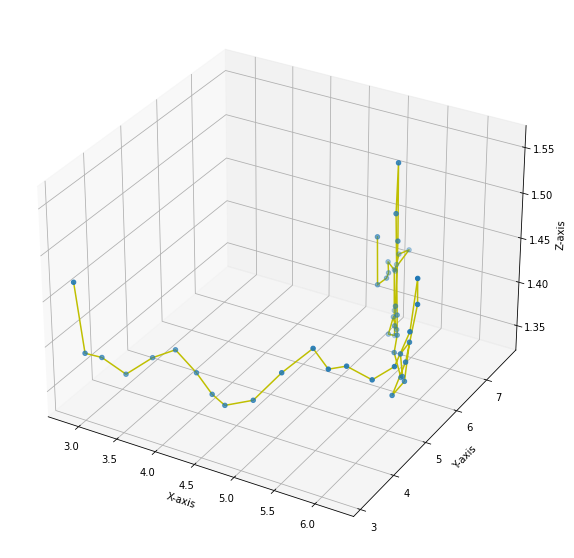

In [14]:
r_values = []
trans_values = []

for i in sorted_alphanumeric(os.listdir(pose)):
#     print(pose+i)
    with open(pose+i) as f:
        lines = f.readlines()
#     print(lines)
#     print(lines[0].split(' '))
    
    r_temp = []
    trans_temp = []
    
    for j in range(len(lines)-1):
        r_temp_2 = []
        for i in range(len(lines[j].split(' '))-1):
#             print(lines[j].split(' ')[i])
            r_temp_2.append(float(lines[j].split(' ')[i]))
        r_temp.append(r_temp_2)
#         print("------")
#         print(lines[j].split(' ')[-1])
        trans_temp.append(float(lines[j].split(' ')[-1]))
    r_temp = np.array(r_temp)
#     print(r_temp)
#     print(trans_temp)
    r_values.append(r_temp)
    trans_values.append(trans_temp)

trans_values_np = np.array(trans_values)
sequence_containing_x_vals =  [x[0] for x in trans_values_np]
sequence_containing_y_vals =  [x[1] for x in trans_values_np]
sequence_containing_z_vals =  [x[2] for x in trans_values_np]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

sequence_containing_x_vals =  [x[0] for x in trans_values_np]
sequence_containing_y_vals =  [x[1] for x in trans_values_np]
sequence_containing_z_vals =  [x[2] for x in trans_values_np]


ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
ax.plot(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, color='y')

xLabel = ax.set_xlabel('X-axis', linespacing=3.2)
yLabel = ax.set_ylabel('Y-axis', linespacing=3.1)
zLabel = ax.set_zlabel('Z-axis', linespacing=3.4)
plt.show()

## Experimental code

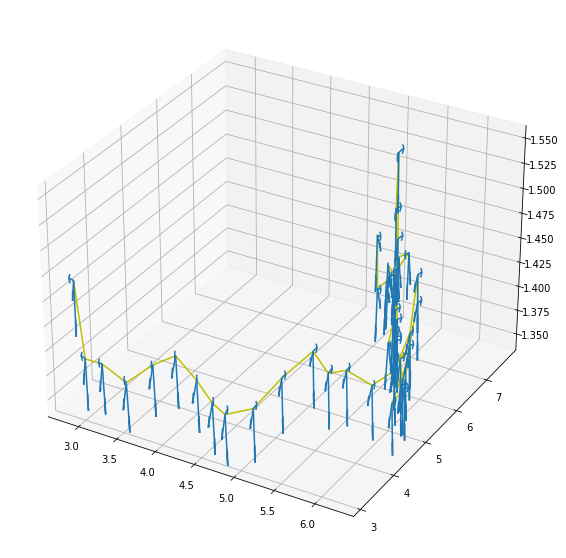

In [15]:
x_x = []
y_x = []
z_x = []

x_y = []
y_y = []
z_y = []

x_z = []
y_z = []
z_z = []

for i in r_values:
#     r = R.from_quat(i)
    r = i
    x_x.append(r[:,0][0])
    y_x.append(r[:,0][1])
    z_x.append(r[:,0][2])
    x_y.append(r[:,1][0])
    y_y.append(r[:,1][1])
    z_y.append(r[:,1][2])
    x_z.append(r[:,2][0])
    y_z.append(r[:,2][1])
    z_z.append(r[:,2][2])

values1 = []
values2 = []
values3 = []

for i,j,k,a,b,c in zip(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, x_x, y_x, z_x):
#     print(i,j,k,a,b,c)
    values1.append([i,j,k,a,b,c])

for i,j,k,a,b,c in zip(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, x_y, y_y, z_y):
    values2.append([i,j,k,a,b,c])

for i,j,k,a,b,c in zip(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, x_z, y_z, z_z):
    values3.append([i,j,k,a,b,c])

soa1 = np.array(values1)
X_x, Y_x, Z_x, U_x, V_x, W_x = zip(*soa1)

soa2 = np.array(values2)
X_y, Y_y, Z_y, U_y, V_y, W_y = zip(*soa2)

soa3 = np.array(values3)
X_z, Y_z, Z_z, U_z, V_z, W_z = zip(*soa3)


# Color by azimuthal angle
c = np.arctan2(U_z, V_z)
# Flatten and normalize
c = (c.ravel() - c.min()) / c.ptp()
# Repeat for each body line and two head lines
c = np.concatenate((c, np.repeat(c, 2)))
# Colormap
c = plt.cm.hsv(c)

fig = plt.figure(figsize=(10, 10))
# ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X_x+X_y+X_z, Y_x+Y_y+Y_z, Z_x+Z_y+Z_z, U_x+U_y+U_z, V_x+V_y+V_z, W_x+W_y+W_z, length=0.06, normalize=True)
# ax.quiver(X_y, Y_y, Z_y, U_y, V_y, W_y, length=0.006, normalize=True, cmap='Reds')
# ax.quiver(X_z, Y_z, Z_z, U_z, V_z, W_z, length=0.006, normalize=True, cmap='Reds')
ax.plot(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, color='y')
plt.show()

1.0000003566786495
[[ 0.905897 -0.117452  0.406886]
 [-0.42349  -0.257482  0.868539]
 [ 0.002754 -0.959118 -0.282992]]
1.0000003893236165
[[ 0.915927 -0.148886  0.372709]
 [-0.401345 -0.337403  0.851517]
 [-0.001026 -0.929512 -0.36879 ]]
1.0000005409646726
[[ 0.886249 -0.169399  0.431124]
 [-0.463125 -0.341882  0.817699]
 [ 0.008876 -0.924349 -0.381445]]
0.9999987360055851
[[ 0.619003 -0.309676  0.721758]
 [-0.784816 -0.208817  0.583488]
 [-0.029977 -0.927629 -0.372298]]
1.0000005265021368
[[ 0.362383 -0.406004  0.838952]
 [-0.931913 -0.143623  0.333032]
 [-0.01472  -0.902515 -0.430407]]
1.0000001597733679
[[ 0.031173 -0.451242  0.891857]
 [-0.997792  0.038299  0.054254]
 [-0.058639 -0.89158  -0.449052]]
1.0000002372756853
[[-0.304181 -0.46869   0.829339]
 [-0.950571  0.206332 -0.23204 ]
 [-0.062364 -0.858928 -0.508285]]
1.0000002353985737
[[-0.562374 -0.388811  0.729769]
 [-0.824228  0.334252 -0.457082]
 [-0.066208 -0.858546 -0.508443]]
1.0000003027984525
[[-0.636697 -0.383719  0.6688

ValueError: Expected rotation matrix, but it failed the test for inversion by transposition. np.dot(R, R.T) gives array([[ 9.99999621e-01, -7.75730000e-08, -2.98473000e-07],
       [-7.75730000e-08,  9.99999429e-01,  1.07327200e-06],
       [-2.98473000e-07,  1.07327200e-06,  1.00000018e+00]])

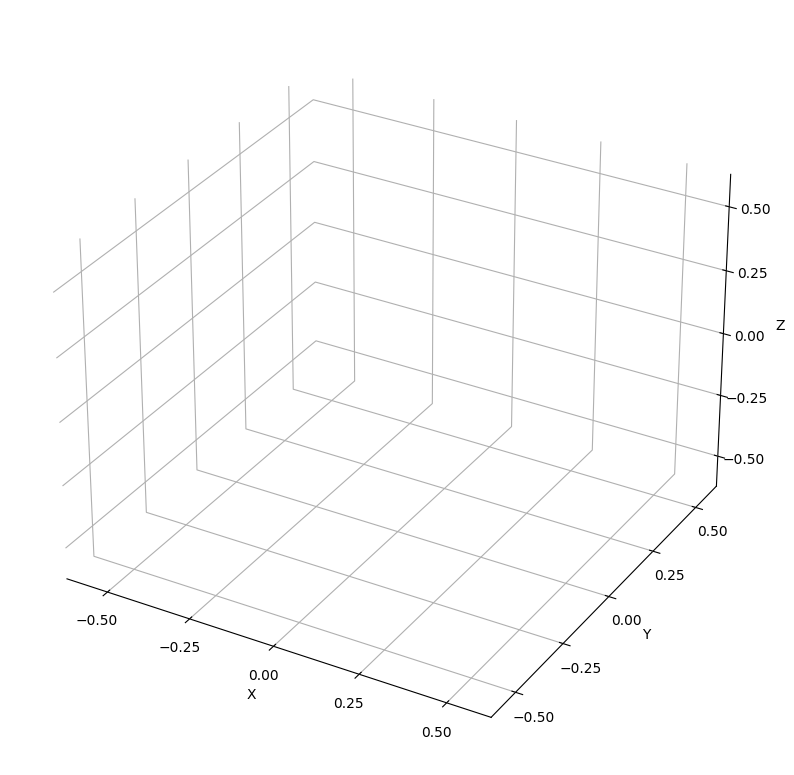

In [16]:
figure(figsize=(10, 10), dpi=100)
ax = None
for t in range(len(r_values)):
    R = r_values[t]
    print(np.linalg.det(R))
    print(R)
    if np.linalg.det(R) > 0.999999:
        ax = plot_basis(ax=ax, s=0.1, R=R, p=trans_values_np[t], ax_s=0.6)
#     print(t)
ax.plot(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, color='y')
plt.show()

In [ ]:
with open('/home/latai/Downloads/data/test_02/ARCore_sensor_pose.txt') as f:
    lines = f.readlines()

In [ ]:
quat_values = []
trans_values = []

for i in lines[1:]:
    quat_values.append(list(map(float, i.split()))[1:5])
    
    trans_values.append(list(map(float, i.split()))[5:])

quat_values_np = np.array(quat_values)
trans_values_np = np.array(trans_values)

sequence_containing_x_vals =  [x[0] for x in trans_values_np]
sequence_containing_y_vals =  [x[1] for x in trans_values_np]
sequence_containing_z_vals =  [x[2] for x in trans_values_np]

In [ ]:
figure(figsize=(10, 10), dpi=100)
ax = None
for t in range(len(quat_values_np)):
    R = matrix_from_quaternion(quat_values_np[t])
    print(R)
    print(type(R))
    print(R.shape)
    break
    ax = plot_basis(ax=ax, s=0.1, R=R, p=trans_values_np[t], ax_s=0.6)
ax.plot(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, color='y')
plt.show()